In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline


In [5]:
df = pd.read_csv("./Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df['label'].nunique()

22

In [10]:
df['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df["label_encoder"]=label_encoder.fit_transform(df["label"])

In [12]:
df1=df[["label","label_encoder"]]
df1=df1.drop_duplicates("label")
df1

,label,label_encoder
0,rice,20
100,maize,11
200,chickpea,3
300,kidneybeans,9
400,pigeonpeas,18
500,mothbeans,13
600,mungbean,14
700,blackgram,2
800,lentil,10
900,pomegranate,19


In [13]:
df1=df1.set_index("label")
label_dict=df1["label_encoder"].to_dict()
label_dict


{'rice': 20,
 'maize': 11,
 'chickpea': 3,
 'kidneybeans': 9,
 'pigeonpeas': 18,
 'mothbeans': 13,
 'mungbean': 14,
 'blackgram': 2,
 'lentil': 10,
 'pomegranate': 19,
 'banana': 1,
 'mango': 12,
 'grapes': 7,
 'watermelon': 21,
 'muskmelon': 15,
 'apple': 0,
 'orange': 16,
 'papaya': 17,
 'coconut': 4,
 'cotton': 6,
 'jute': 8,
 'coffee': 5}

In [14]:
#CONVERTING OBJECT TYPE TO INTEGER TYPE
#Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'label'
df['label']= label_encoder.fit_transform(df['label'])

df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

DATA VISUALIZATION



<Axes: >

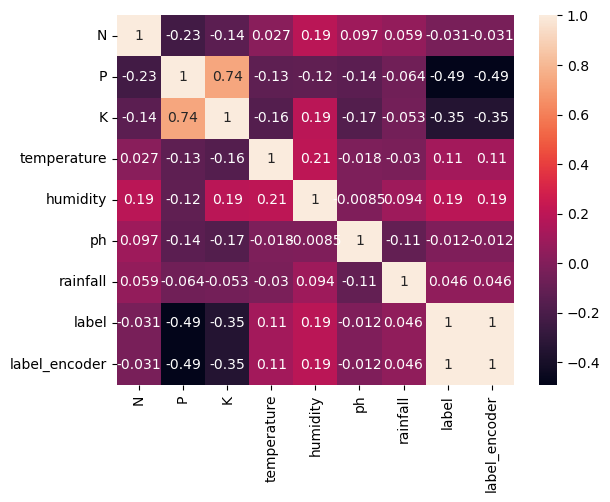

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
#Seperating features and target label

feature = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [17]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feature,target,test_size = 0.2,random_state =2)

In [18]:
# Initializing empty lists to append all model's name and corresponding name

acc = []
model = []

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

LogReg = LogisticRegression(random_state=42,max_iter=2000, solver='saga')

LogReg.fit(Xtrain_scaled,Ytrain)

predicted_values = LogReg.predict(Xtest_scaled)
x = metrics.accuracy_score(Ytest, predicted_values)


In [20]:
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  96.36363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.88      0.94      0.91        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.92      1.00      0.96        23
          11       1.00      0.95      0.98        21
          12       0.96      1.00      0.98        26
          13       1.00      0.84      0.91        19
          14       0.96      1.00      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00    

In [21]:
from sklearn.model_selection import cross_val_score

#Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,feature,target,cv=5)
score

C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

array([0.96363636, 0.96363636, 0.97045455, 0.96590909, 0.95681818])

In [22]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00   

C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

# Gussian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00   

# SVM

In [24]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  10.681818181818182
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       1.00      0.24      0.38        17
           2       1.00      0.19      0.32        16
           3       1.00      0.05      0.09        21
           4       1.00      0.05      0.09        21
           5       0.00      0.00      0.00        22
           6       1.00      0.05      0.10        20
           7       1.00      0.06      0.11        18
           8       1.00      0.07      0.13        28
           9       0.03      1.00      0.07        14
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        19
          14       1.00      0.12      0.22        24
          15       1.00      0.30      0.47        23
          16       1.00      0.03      0.0

C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

# KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

kn =  KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

kn.fit(Xtrain,Ytrain)

predicted_values = kn.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('kn')
print("KNeighborsClassifier's Accuracy is: ", x*100)

KNeighborsClassifier's Accuracy is:  97.5


# XGBoost

In [26]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x*100)

XGBoost's Accuracy is:  99.0909090909091


In [27]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.9636363636363636
Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.10681818181818181
kn --> 0.975
XGBoost --> 0.990909090909091


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algoritm'>

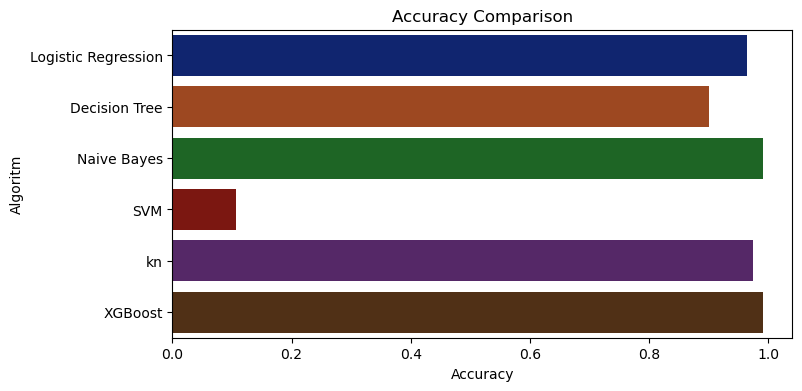

In [28]:
#Accuracy Comparison
plt.figure(figsize=[8,4])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algoritm')
sns.barplot(x = acc,y = model,palette='dark')

In [30]:
data = [[98,18, 15, 20.603016, 80.3, 8.7, 200.91]]
prediction = NaiveBayes.predict(data)
print(prediction)


[5]


C:\Users\shaswot paudel\.conda\envs\krishi-vue-api\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [40]:
import joblib

# Your trained machine learning model
model = NaiveBayes  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = "CropPredictionModel.joblib"

# Save the model to the file
joblib.dump(model, model_filename)


['CropPredictionModel.joblib']